# Initial Data Exploration

## Rentability

In [1]:
import pandas as pd
ipo_df = pd.read_csv("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/COTAHIST_A2015_2021.csv")
ipo_details = pd.read_excel("C:/Users/davir/davigit/Projeto_Intro_CD/datasets/IPO_details.xlsx")

In [2]:
ipo_df

,date,codneg,preabe,preult
0,2015-06-05,WIZS3,13.60,13.90
1,2015-06-08,WIZS3,14.11,13.78
2,2015-06-09,WIZS3,13.78,13.65
3,2015-06-10,WIZS3,13.70,14.00
4,2015-06-11,WIZS3,14.01,14.26
...,...,...,...,...
22518,2021-06-09,TFCO4,13.45,13.45
22519,2021-06-09,VAMO3,52.41,51.96
22520,2021-06-09,VIVA3,31.37,31.66
22521,2021-06-09,WEST3,8.83,8.77


In [3]:
ipo_details

,Tickers,Preco_fixado,Total_Investidores,Volume,Varejo,Institucional,Estrangeiros,Outros,Min_faixa,Max_faixa
0,WIZS3,12.33,4527,6.028000e+08,0.098221,0.374098,0.521481,0.006200,11.25,11.60
1,AALR3,20.00,2035,6.741976e+08,0.093510,0.369668,0.530330,0.006491,19.00,22.00
2,MOVI3,7.50,1373,6.000838e+08,0.093400,0.308660,0.450425,0.147514,7.50,8.90
3,PARD3,19.00,5042,8.776688e+08,0.100529,0.480254,0.413150,0.006067,18.71,22.71
4,AZUL4,21.00,1753,2.021037e+09,0.063674,0.076148,0.858268,0.001910,19.00,23.00
...,...,...,...,...,...,...,...,...,...,...
64,GGPS3,12.00,0,2.164502e+09,0.000000,0.000000,0.000000,0.000000,13.00,15.50
65,SOJA3,9.90,0,4.000000e+08,0.000000,0.000000,0.000000,0.000000,9.90,12.60
66,CXSE3,9.67,0,4.351500e+09,0.000000,0.000000,0.000000,0.000000,9.33,12.67
67,MODL11,20.01,0,3.064532e+09,0.000000,0.000000,0.000000,0.000000,24.30,32.82


In [10]:
tickers = list(ipo_details.Tickers)
preco_fixado = list(ipo_details['Preco_fixado'])
dict_tickers = dict(zip(tickers, preco_fixado))

In [11]:
date_list = []
for ticker in tickers:
    df = ipo_df[ipo_df.codneg==ticker]
    date_list.append(df["date"].iloc[0])
    
date_ipo_df = pd.DataFrame(list(zip(tickers, date_list)), columns=["tickers", "date"])
date_ipo_df["date"] = pd.to_datetime(date_ipo_df["date"], format='%Y-%m-%d')
date_ipo_df.head()

,tickers,date
0,WIZS3,2015-06-05
1,AALR3,2016-10-28
2,MOVI3,2017-02-08
3,PARD3,2017-02-14
4,AZUL4,2017-04-11


In [12]:
def rentability(ticker, dias_uteis, dict_ticker=dict_tickers, data=ipo_df):
    ticker = ticker.upper()
    df = data[data.codneg==ticker]
    df = df.reset_index(drop=True)
    variation = ((df["preult"].iloc[dias_uteis-1]/dict_ticker[ticker])-1)*100
    return variation

In [32]:
ipos_2015 = date_ipo_df[(date_ipo_df['date'] >= '2015-01-01') & (date_ipo_df['date'] <= '2015-12-31')]
ipos_2016 = date_ipo_df[(date_ipo_df['date'] >= '2016-01-01') & (date_ipo_df['date'] <= '2016-12-31')]
ipos_2017 = date_ipo_df[(date_ipo_df['date'] >= '2017-01-01') & (date_ipo_df['date'] <= '2017-12-31')]
ipos_2018 = date_ipo_df[(date_ipo_df['date'] >= '2018-01-01') & (date_ipo_df['date'] <= '2018-12-31')]
ipos_2019 = date_ipo_df[(date_ipo_df['date'] >= '2019-01-01') & (date_ipo_df['date'] <= '2019-12-31')]
ipos_2020 = date_ipo_df[(date_ipo_df['date'] >= '2020-01-01') & (date_ipo_df['date'] <= '2020-12-31')]
ipos_2021 = date_ipo_df[(date_ipo_df['date'] >= '2021-01-01') & (date_ipo_df['date'] <= '2021-06-09')]

In [33]:
date_ipo_df

,tickers,date
0,WIZS3,2015-06-05
1,AALR3,2016-10-28
2,MOVI3,2017-02-08
3,PARD3,2017-02-14
4,AZUL4,2017-04-11
...,...,...
64,GGPS3,2021-04-26
65,SOJA3,2021-04-29
66,CXSE3,2021-04-29
67,MODL11,2021-04-30


## 2015

In [34]:
rent_df_15 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_15 = ipos_2015["tickers"]
for t in tickers_15:
    rent_df_15.loc[t] = [rentability(t, c) for c in time]
rent_df_15['year'] = 2015
rent_df_15.describe()

,1D,15D,1M,today,year
count,1.000000,1.000000,1.000000,1.000000,1.0
mean,12.733171,18.410381,14.111922,5.271695,2015.0
std,NaN,NaN,NaN,NaN,NaN
min,12.733171,18.410381,14.111922,5.271695,2015.0
25%,12.733171,18.410381,14.111922,5.271695,2015.0
50%,12.733171,18.410381,14.111922,5.271695,2015.0
75%,12.733171,18.410381,14.111922,5.271695,2015.0
max,12.733171,18.410381,14.111922,5.271695,2015.0


<AxesSubplot:>

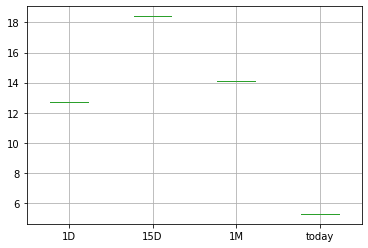

In [35]:
rent_df_15.boxplot(column=['1D', '15D', '1M', 'today'])

## 2016

In [36]:
rent_df_16 = pd.DataFrame(columns=["1D", "15D", "1M",])
time = [1, 10, 20, -1]
tickers_16 = ipos_2016["tickers"]
for t in tickers_16:
    rent_df_16.loc[t] = [rentability(t, c) for c in time]
rent_df_16['year'] = 2016
rent_df_16.describe()

,1D,15D,1M,today,year
count,1.0,1.00,1.0,1.0,1.0
mean,-4.0,-23.75,-20.0,-43.1,2016.0
std,NaN,NaN,NaN,NaN,NaN
min,-4.0,-23.75,-20.0,-43.1,2016.0
25%,-4.0,-23.75,-20.0,-43.1,2016.0
50%,-4.0,-23.75,-20.0,-43.1,2016.0
75%,-4.0,-23.75,-20.0,-43.1,2016.0
max,-4.0,-23.75,-20.0,-43.1,2016.0


<AxesSubplot:>

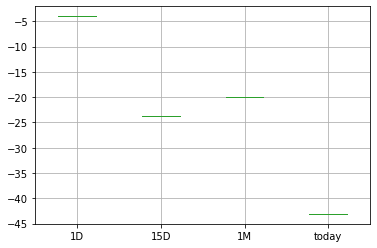

In [37]:
rent_df_16.boxplot(column=['1D', '15D', '1M', 'today'])

## 2017

In [38]:
rent_df_17 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_17 = ipos_2017["tickers"]
for t in tickers_17:
    rent_df_17.loc[t] = [rentability(t, c) for c in time]
rent_df_17['year'] = 2017
rent_df_17.describe()

,1D,15D,1M,today,year
count,9.000000,9.000000,9.000000,9.000000,9.0
mean,3.354082,4.711792,6.391514,54.912199,2017.0
std,4.595710,6.849881,8.824979,84.264692,0.0
min,-2.666667,-5.000000,-5.555556,-77.643172,2017.0
25%,-0.666667,-0.555556,0.533333,10.111111,2017.0
50%,5.769231,4.258443,5.315789,52.266667,2017.0
75%,6.666667,8.910256,11.538462,131.190476,2017.0
max,8.947368,14.866667,20.238095,156.800000,2017.0


<AxesSubplot:>

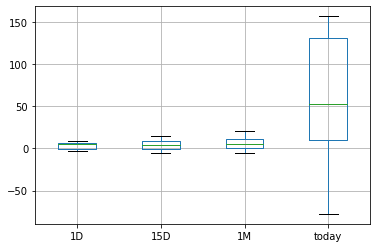

In [39]:
rent_df_17.boxplot(column=['1D', '15D', '1M', 'today'])

## 2018

In [40]:
rent_df_18 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_18 = ipos_2018["tickers"]
for t in tickers_18:
    rent_df_18.loc[t] = [rentability(t, c) for c in time]
rent_df_18['year'] = 2018
rent_df_18.describe()

,1D,15D,1M,today,year
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,14.984230,12.557339,15.639884,135.068732,2018.0
std,13.444859,12.147631,30.967431,251.508510,0.0
min,-0.540541,-0.432432,-19.459459,-32.765957,2018.0
25%,11.093366,7.017826,3.906634,-9.518114,2018.0
50%,22.727273,14.468085,27.272727,13.729730,2018.0
75%,22.746615,19.052224,33.189555,218.986077,2018.0
max,22.765957,23.636364,39.106383,424.242424,2018.0


<AxesSubplot:>

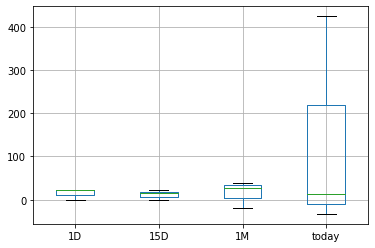

In [41]:
rent_df_18.boxplot(column=['1D', '15D', '1M', 'today'])

## 2019

In [42]:
rent_df_19 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_19 = ipos_2019["tickers"]
for t in tickers_19:
    rent_df_19.loc[t] = [rentability(t, c) for c in time]
rent_df_19['year'] = 2019
rent_df_19.describe()

,1D,15D,1M,today,year
count,5.000000,5.000000,5.000000,5.000000,5.0
mean,-3.453271,-1.695585,-2.110681,34.423225,2019.0
std,13.997895,12.635760,10.706540,91.947323,0.0
min,-27.586207,-19.396552,-15.603448,-56.465517,2019.0
25%,-1.600000,-6.880000,-7.520000,-9.333333,2019.0
50%,0.458333,-2.000000,-0.848485,19.808307,2019.0
75%,3.090909,6.060606,0.000000,30.666667,2019.0
max,8.370607,13.738019,13.418530,187.440000,2019.0


<AxesSubplot:>

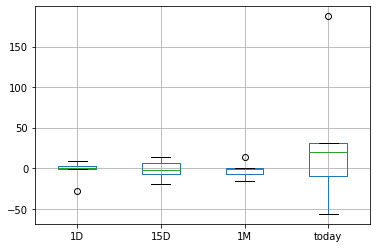

In [43]:
rent_df_19.boxplot(column=['1D', '15D', '1M', 'today'])

## 2020

In [44]:
rent_df_20 = pd.DataFrame(columns=["1D", "15D", "1M", "today"])
time = [1, 10, 20, -1]
tickers_20 = ipos_2020["tickers"]
for t in tickers_20:
    rent_df_20.loc[t] = [rentability(t, c) for c in time]
rent_df_20['year'] = 2020
rent_df_20.describe()

,1D,15D,1M,today,year
count,27.000000,27.000000,27.000000,27.000000,27.0
mean,4.899335,6.625880,6.053839,25.887281,2020.0
std,11.071188,20.330873,34.456192,65.297738,0.0
min,-9.047619,-27.764706,-42.736842,-53.684211,2020.0
25%,-1.808279,-9.566014,-10.695767,-14.840149,2020.0
50%,0.000000,6.719368,3.490909,4.585366,2020.0
75%,13.289038,16.782580,12.768865,53.510992,2020.0
max,34.000000,57.777778,153.555556,270.000000,2020.0


<AxesSubplot:>

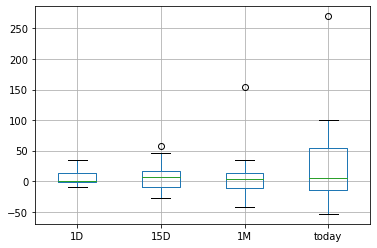

In [45]:
rent_df_20.boxplot(column=['1D', '15D', '1M', 'today'])

## 2021

In [46]:
rent_df_21 = pd.DataFrame(columns=["1D", "15D","today"])
time = [1, 10,-1]
tickers_21 = ipos_2021["tickers"]
for t in tickers_21:
    rent_df_21.loc[t] = [rentability(t, c) for c in time]
rent_df_21['year'] = 2021
rent_df_21.describe()

,1D,15D,today,year
count,23.000000,23.000000,23.000000,23.0
mean,9.338796,6.204570,13.003686,2021.0
std,23.493599,17.800533,33.797745,0.0
min,-13.152053,-20.643729,-32.538462,2021.0
25%,-3.198499,-5.916157,-11.635209,2021.0
50%,2.391629,1.666667,9.529412,2021.0
75%,13.061183,12.416667,20.076131,2021.0
max,96.969697,52.020202,101.884615,2021.0


<AxesSubplot:>

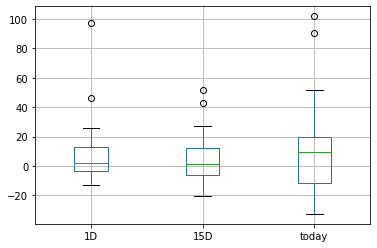

In [47]:
rent_df_21.boxplot(column=['1D', '15D', 'today'])

## 2015 to 2021

In [48]:
rent_df = pd.DataFrame(columns=["1D", "15D", "today"])
time = [1, 10, -1]
for t in tickers:
    rent_df.loc[t] = [rentability(t, c) for c in time]
rent_df.describe()

,1D,15D,today
count,69.000000,69.000000,69.000000
mean,5.995371,5.621224,29.445582
std,16.192957,17.366194,77.170551
min,-27.586207,-27.764706,-77.643172
25%,-1.851852,-6.470588,-13.293353
50%,0.458333,4.216867,10.111111
75%,8.947368,14.500000,49.166667
max,96.969697,57.777778,424.242424


<AxesSubplot:>

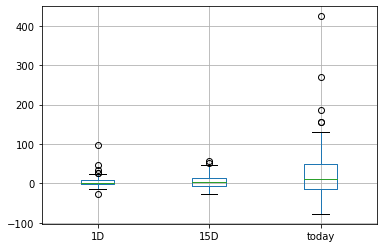

In [49]:
rent_df.boxplot(column=['1D', '15D', 'today'])